In [228]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import os 
import seaborn as sns
from sklearn.model_selection import train_test_split

dset_base = pd.read_csv('dataset.csv',)
dset_extra = pd.read_csv('dataset_atributos_extra.csv')
dset = pd.merge(left=dset_base, right=dset_extra, how="inner")

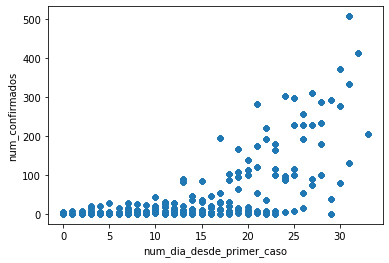

In [224]:
#dset_base['num_confirmados'].describe()
#sns.distplot(dset['num_confirmados']);
paises = ["Peru","Chile","Bolivia","Argentina","Uruguay","Paraguay","Venezuela","Ecuador"]
dset_pais = dset[dset["pais"].isin(paises)]
var = 'num_dia_desde_primer_caso'
data = pd.concat([dset_pais['num_confirmados'], dset_pais[var]], axis=1)
#data = pd.concat([dset['num_confirmados'], dset[var]], axis=1)
data.plot.scatter(x=var, y='num_confirmados');



In [225]:
dset_pais.head()

,num_dia_desde_primer_caso,region,pais,num_confirmados,num_fallecidos,num_recuperados,acc_confirmados,acc_fallecidos,acc_recuperados,es_top_ten_gdp,edad_media,gdp_ranking,gdp_usd,gini,population,taza(muerte/1000)
368459,0,NaN,Ecuador,6,0,0,6,0,0,0,28.8,59.0,107914.0,45.9,17643054,5.2
368460,0,NaN,Ecuador,6,0,0,6,0,0,0,28.8,59.0,107914.0,45.9,17643054,5.2
368461,0,NaN,Ecuador,6,0,0,6,0,0,0,28.8,59.0,107914.0,45.9,17643054,5.2
368462,0,NaN,Ecuador,6,0,0,6,0,0,0,28.8,59.0,107914.0,45.9,17643054,5.2
368463,0,NaN,Ecuador,6,0,0,6,0,0,0,28.8,59.0,107914.0,45.9,17643054,5.2


In [226]:
dset_pais.describe()

,num_dia_desde_primer_caso,num_confirmados,num_fallecidos,num_recuperados,acc_confirmados,acc_fallecidos,acc_recuperados,es_top_ten_gdp,edad_media,gdp_ranking,gdp_usd,gini,taza(muerte/1000)
count,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000,6232.0,6232.000000,6232.000000,6232.000000,6232.000000,6232.000000
mean,14.042522,54.147144,1.472882,6.846117,416.444801,7.940629,29.654365,0.0,30.873732,58.195603,190347.615051,45.872336,6.429509
std,8.769190,92.385753,3.785015,30.350817,741.116557,19.319817,85.207238,0.0,3.118384,21.735792,144228.762816,3.892303,1.175877
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,25.300000,28.000000,40714.000000,39.000000,4.900000
25%,7.000000,1.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.0,28.800000,41.000000,59918.000000,41.700000,5.200000
50%,14.000000,10.000000,0.000000,0.000000,74.000000,1.000000,0.000000,0.0,29.700000,59.000000,107914.000000,45.900000,6.300000
75%,21.000000,75.000000,1.000000,0.000000,416.000000,5.000000,8.000000,0.0,32.400000,80.000000,294237.000000,50.500000,7.400000
max,33.000000,508.000000,27.000000,341.000000,3737.000000,145.000000,537.000000,0.0,35.500000,91.000000,445469.000000,51.700000,9.300000


In [227]:
dset_pais.corr()

,num_dia_desde_primer_caso,num_confirmados,num_fallecidos,num_recuperados,acc_confirmados,acc_fallecidos,acc_recuperados,es_top_ten_gdp,edad_media,gdp_ranking,gdp_usd,gini,taza(muerte/1000)
num_dia_desde_primer_caso,1.000000,0.672795,0.557135,0.307725,0.732858,0.613346,0.506885,NaN,0.033567,-0.164979,0.136720,0.068490,-0.118360
num_confirmados,0.672795,1.000000,0.629443,0.294774,0.881263,0.617775,0.468393,NaN,0.171559,-0.261775,0.154906,0.144627,-0.121467
num_fallecidos,0.557135,0.629443,1.000000,0.239185,0.699167,0.929979,0.389415,NaN,-0.125615,-0.099606,-0.005649,-0.037896,-0.178855
num_recuperados,0.307725,0.294774,0.239185,1.000000,0.367700,0.207338,0.628689,NaN,0.083644,-0.146223,0.134382,0.008465,0.035749
acc_confirmados,0.732858,0.881263,0.699167,0.367700,1.000000,0.752238,0.579301,NaN,0.162488,-0.241138,0.140332,0.121405,-0.102153
acc_fallecidos,0.613346,0.617775,0.929979,0.207338,0.752238,1.000000,0.419453,NaN,-0.124820,-0.117580,0.014917,-0.046510,-0.186924
acc_recuperados,0.506885,0.468393,0.389415,0.628689,0.579301,0.419453,1.000000,NaN,0.125364,-0.250500,0.246574,-0.047953,0.084397
es_top_ten_gdp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad_media,0.033567,0.171559,-0.125615,0.083644,0.162488,-0.124820,0.125364,NaN,1.000000,-0.485016,0.504587,0.020019,0.538727
gdp_ranking,-0.164979,-0.261775,-0.099606,-0.146223,-0.241138,-0.117580,-0.250500,NaN,-0.485016,1.000000,-0.931125,0.268772,-0.233234


In [239]:
X = dset_pais.iloc[:,0:1].values
y = dset_pais.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

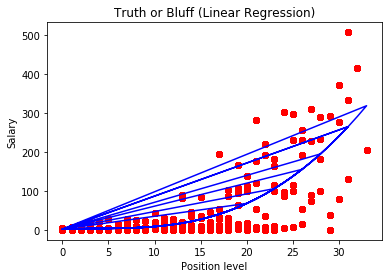

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()